# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다.
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 :
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다.
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ...
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

open_data = '/content/drive/MyDrive/KTaivle/2차미니프로젝트/open_data.csv'
weather = '/content/drive/MyDrive/KTaivle/2차미니프로젝트/weather.csv'

open_data = pd.read_csv(open_data, sep=',', encoding='utf-8', index_col=0)
weather = pd.read_csv(weather, sep=',', encoding='utf-8', index_col=0)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

open_data.index.name = 'Date'
open_data.head()

,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
Date,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764
2015-01-02,420,3158,2839,17.2,2216,8611
2015-01-03,209,1648,1514,26.2,2377,10198
2015-01-04,196,1646,1526,24.5,2431,10955
2015-01-05,421,4250,3730,26.2,2214,8663


In [ ]:
weather.head()

,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
Date,,,,,,
2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


#### 2) 기본 정보 조회

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 행,열 개수 확인

print(open_data.info())
print(open_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 2015-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   차량운행    2922 non-null   int64  
 1   접수건     2922 non-null   int64  
 2   탑승건     2922 non-null   int64  
 3   평균대기시간  2922 non-null   float64
 4   평균요금    2922 non-null   int64  
 5   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 159.8+ KB
None
              차량운행          접수건          탑승건       평균대기시간         평균요금  \
count  2922.000000  2922.000000  2922.000000  2922.000000  2922.000000   
mean    418.701916  3925.607803  3283.895277    40.305681  2304.272416   
std     133.755162  1509.741713  1249.165876    14.098550   107.260080   
min     132.000000   527.000000   462.000000    17.200000  2131.000000   
25%     278.000000  2162.500000  1779.000000    29.600000  2228.000000   
50%     454.000000  4720.500000  3932.500000    38.200000  2257.000000   
75%     522.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 모든 변수 확인

print(weather.info())
print(weather.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 2012-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_max         4018 non-null   float64
 1   temp_min         4018 non-null   float64
 2   rain(mm)         4018 non-null   float64
 3   humidity_max(%)  4018 non-null   float64
 4   humidity_min(%)  4018 non-null   float64
 5   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6)
memory usage: 219.7+ KB
None
          temp_max     temp_min     rain(mm)  humidity_max(%)  \
count  4018.000000  4018.000000  4018.000000      4018.000000   
mean     17.794301     9.309731     3.400722        78.873395   
std      10.859689    10.881519    12.641311        14.054773   
min     -11.200000   -18.500000     0.000000        29.000000   
25%       8.400000     0.300000     0.000000        70.000000   
50%      19.600000     9.900000     0.000000        81.000000   
75%      27.3

#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

new_columns = {
    '차량운행': 'vehicle_operation',
    '접수건': 'receipt_count',
    '탑승건': 'boarding_count',
    '평균대기시간': 'average_waiting_time',
    '평균요금': 'average_fare',
    '평균승차거리': 'average_distance'
}

open_data.rename(columns=new_columns, inplace=True)

## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

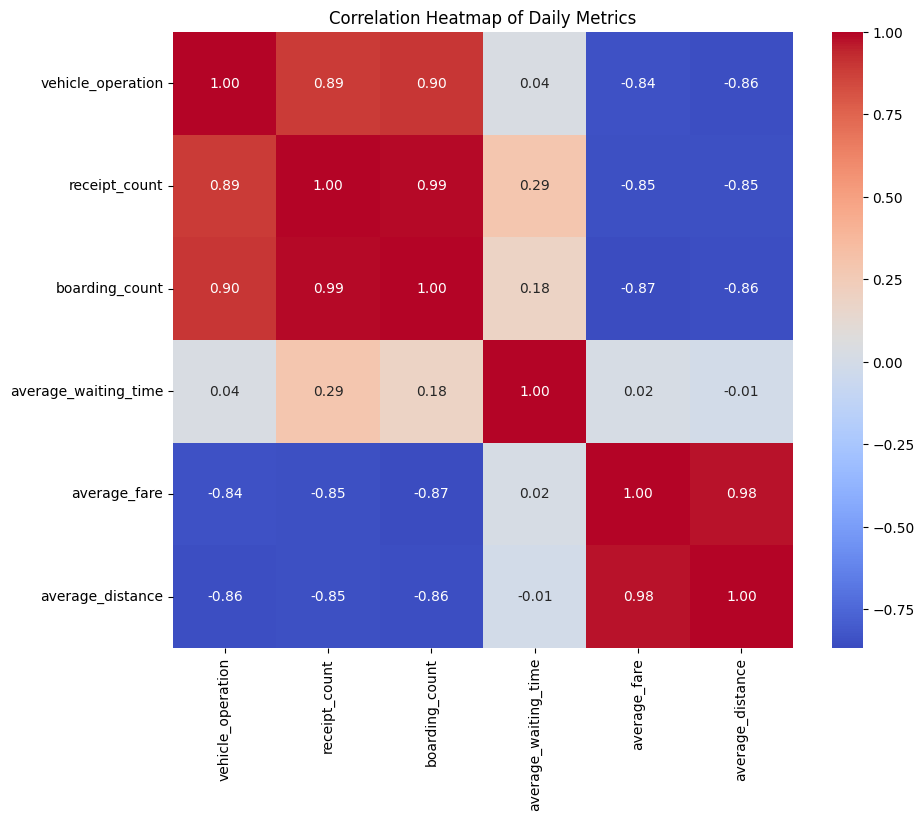

In [ ]:
correlation = df[['vehicle_operation', 'receipt_count', 'boarding_count', 'average_waiting_time', 'average_fare', 'average_distance']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Daily Metrics')
plt.show()

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = open_data.copy()

print(df.head())

            vehicle_operation  receipt_count  boarding_count  \
Date                                                           
2015-01-01                213           1023             924   
2015-01-02                420           3158            2839   
2015-01-03                209           1648            1514   
2015-01-04                196           1646            1526   
2015-01-05                421           4250            3730   

            average_waiting_time  average_fare  average_distance  
Date                                                              
2015-01-01                  23.2          2427             10764  
2015-01-02                  17.2          2216              8611  
2015-01-03                  26.2          2377             10198  
2015-01-04                  24.5          2431             10955  
2015-01-05                  26.2          2214              8663  


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.dayofweek

df['ratio'] = df['boarding_count']/df['receipt_count']
print(df)

            vehicle_operation  receipt_count  boarding_count  \
Date                                                           
2015-01-01                213           1023             924   
2015-01-02                420           3158            2839   
2015-01-03                209           1648            1514   
2015-01-04                196           1646            1526   
2015-01-05                421           4250            3730   
...                       ...            ...             ...   
2022-12-27                669           5635            4654   
2022-12-28                607           5654            4648   
2022-12-29                581           5250            4247   
2022-12-30                600           5293            4200   
2022-12-31                263           2167            1806   

            average_waiting_time  average_fare  average_distance       Date  \
Date                                                                          
2015-01-0

### (2) 일별

* 차량 운행수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['vehicle_operation'].sum()

print(daily_traffic)

day
1     37284
2     40274
3     39227
4     40192
5     39261
6     39267
7     41048
8     41159
9     39269
10    39944
11    40443
12    39935
13    40044
14    40815
15    39584
16    40412
17    40517
18    40579
19    40484
20    40193
21    40923
22    41118
23    42265
24    39939
25    38950
26    40343
27    40276
28    40648
29    38747
30    37325
31    22982
Name: vehicle_operation, dtype: int64


* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['receipt_count'].sum()

print(daily_traffic)

day
1     332415
2     376817
3     357627
4     373091
5     360480
6     359113
7     386886
8     389573
9     361924
10    375410
11    381564
12    378397
13    381073
14    385842
15    368585
16    379408
17    379098
18    383325
19    381783
20    391787
21    391696
22    390149
23    391810
24    373578
25    364091
26    382662
27    383016
28    386785
29    362610
30    346037
31    213994
Name: receipt_count, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['boarding_count'].sum()

print(daily_traffic)

day
1     276017
2     314642
3     300402
4     313919
5     302697
6     302243
7     324256
8     326384
9     305344
10    314667
11    319458
12    318024
13    317919
14    323081
15    308872
16    318915
17    318820
18    321189
19    319382
20    324285
21    327168
22    327568
23    327970
24    311395
25    303522
26    320303
27    318317
28    321189
29    301613
30    288441
31    177540
Name: boarding_count, dtype: int64


* 대기시간

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['average_waiting_time'].sum()

print(daily_traffic)

day
1     3561.2
2     3606.2
3     3515.1
4     3684.7
5     3690.8
6     3508.9
7     3843.9
8     3966.1
9     3679.2
10    3896.3
11    3824.3
12    3860.4
13    3908.3
14    3949.1
15    3801.8
16    3832.5
17    3813.3
18    3975.7
19    3937.8
20    4265.9
21    4073.4
22    3920.5
23    3973.8
24    3974.0
25    4027.7
26    3933.5
27    4107.4
28    4120.4
29    3733.8
30    3556.9
31    2230.3
Name: average_waiting_time, dtype: float64


* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['average_fare'].sum()

print(daily_traffic)

day
1     223275
2     219929
3     221996
4     221070
5     221734
6     221538
7     220306
8     220714
9     221458
10    221215
11    220911
12    221219
13    221109
14    221144
15    221722
16    220391
17    220699
18    220913
19    221118
20    221710
21    220750
22    220607
23    220185
24    221738
25    222376
26    220914
27    221589
28    221664
29    207188
30    202746
31    129156
Name: average_fare, dtype: int64


* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['average_distance'].sum()

print(daily_traffic)

day
1     910264
2     876329
3     895800
4     887316
5     893809
6     892251
7     880299
8     883154
9     892385
10    888300
11    884675
12    887274
13    886429
14    887660
15    891920
16    880338
17    883263
18    885144
19    887504
20    894086
21    883471
22    881683
23    878354
24    892470
25    901226
26    886959
27    891192
28    892796
29    829002
30    813850
31    519524
Name: average_distance, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

daily_traffic = df.groupby('day')['ratio'].sum()

print(daily_traffic)

day
1     80.052323
2     80.655010
3     81.102027
4     81.278654
5     81.405268
6     81.400874
7     80.994343
8     80.854303
9     81.138426
10    80.907640
11    80.922295
12    81.379044
13    80.882798
14    80.946959
15    80.882056
16    80.914281
17    81.199497
18    80.915291
19    80.936935
20    80.320140
21    80.616666
22    81.089742
23    80.510356
24    80.181249
25    80.262273
26    80.922565
27    80.143002
28    80.222208
29    75.300004
30    73.857942
31    46.893107
Name: ratio, dtype: float64


### (3) 월별



* 차량 운행수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['vehicle_operation'].sum()

print(monthly_traffic)

month
1      94063
2      84408
3      98892
4      99885
5     102562
6     103422
7     108360
8     107756
9     107139
10    107369
11    108116
12    101475
Name: vehicle_operation, dtype: int64


* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['receipt_count'].sum()

print(monthly_traffic)

month
1      913093
2      809554
3      915450
4      951475
5      969822
6      960313
7     1016710
8      995711
9      951002
10     993912
11    1018558
12     975026
Name: receipt_count, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['boarding_count'].sum()

print(monthly_traffic)

month
1     766881
2     685249
3     785868
4     806054
5     813052
6     809481
7     852590
8     830927
9     789108
10    822579
11    839640
12    794113
Name: boarding_count, dtype: int64


* 대기시간

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['average_waiting_time'].sum()

print(monthly_traffic)

month
1      8281.7
2      7778.8
3      8725.2
4      9510.9
5     10213.0
6      9691.6
7      9928.3
8      9565.1
9     10167.4
10    11031.1
11    11295.2
12    11584.9
Name: average_waiting_time, dtype: float64


* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['average_fare'].sum()

print(monthly_traffic)

month
1     565345
2     519037
3     568317
4     554571
5     576900
6     554158
7     568021
8     566975
9     559580
10    579024
11    554202
12    566954
Name: average_fare, dtype: int64


* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('month')['average_distance'].sum()

print(monthly_traffic)

month
1     2243944
2     2083955
3     2264138
4     2235230
5     2346687
6     2230236
7     2269586
8     2263514
9     2278324
10    2352423
11    2220331
12    2250359
Name: average_distance, dtype: int64


### (4) 요일별

* 차량 운행수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['vehicle_operation'].sum()

print(monthly_traffic)

weekday
0    202251
1    206447
2    202131
3    206525
4    202775
5    109590
6     93728
Name: vehicle_operation, dtype: int64


* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['receipt_count'].sum()

print(monthly_traffic)

weekday
0    1966172
1    2001969
2    1976302
3    1989963
4    1961284
5     864876
6     710060
Name: receipt_count, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['boarding_count'].sum()

print(monthly_traffic)

weekday
0    1651838
1    1679172
2    1650059
3    1662888
4    1620747
5     708025
6     622813
Name: boarding_count, dtype: int64


* 대기시간

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['average_waiting_time'].sum()

print(monthly_traffic)

weekday
0    16364.4
1    17024.5
2    17379.0
3    17156.3
4    17119.8
5    18174.7
6    14554.5
Name: average_waiting_time, dtype: float64


* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['average_fare'].sum()

print(monthly_traffic)

weekday
0     934105
1     935250
2     938426
3     943161
4     938838
5    1015590
6    1027714
Name: average_fare, dtype: int64


* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

monthly_traffic = df.groupby('weekday')['average_distance'].sum()

print(monthly_traffic)

weekday
0    3609793
1    3616271
2    3649600
3    3672925
4    3650672
5    4360354
6    4479112
Name: average_distance, dtype: int64


### (5) 연도별

* 차량 운행수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

yearly_traffic = df.groupby('year')['vehicle_operation'].sum()

print(yearly_traffic)

year
2015    139236
2016    142855
2017    147970
2018    145182
2019    145660
2020    152447
2021    170919
2022    179178
Name: vehicle_operation, dtype: int64


* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

yearly_traffic = df.groupby('year')['receipt_count'].sum()

print(yearly_traffic)

year
2015    1368944
2016    1465862
2017    1527432
2018    1488278
2019    1498091
2020    1148318
2021    1385840
2022    1587861
Name: receipt_count, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

yearly_traffic = df.groupby('year')['boarding_count'].sum()

print(yearly_traffic)

year
2015    1193066
2016    1251055
2017    1267174
2018    1171424
2019    1179052
2020     972211
2021    1220600
2022    1340960
Name: boarding_count, dtype: int64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

yearly_traffic = df.groupby('year')['average_waiting_time'].sum()

print(yearly_traffic)

year
2015    12431.7
2016    14007.7
2017    16112.2
2018    20557.6
2019    19511.3
2020    10264.5
2021    11213.1
2022    13675.1
Name: average_waiting_time, dtype: float64


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

yearly_traffic = df.groupby('year')['average_distance'].sum()

print(yearly_traffic)

year
2015    3489026
2016    3506907
2017    3398599
2018    3393357
2019    3379365
2020    3360324
2021    3235556
2022    3275593
Name: average_distance, dtype: int64


## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 :
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_weather = weather.copy()
df_weather = df_weather.shift(1)
df_weather.head()

,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
Date,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,0.4,-6.6,0.0,77.0,45.0,4.90
2012-01-03,-1.2,-8.3,0.0,80.0,48.0,6.16
2012-01-04,-0.4,-6.6,0.4,86.0,45.0,4.46
2012-01-05,-4.6,-9.5,0.0,66.0,38.0,8.05


### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정

df['target'] = df['average_waiting_time'].shift(-1)
df.head()

,vehicle_operation,receipt_count,boarding_count,average_waiting_time,average_fare,average_distance,Date,year,month,day,weekday,target
Date,,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,2015-01-01,2015,1,1,3,17.2
2015-01-02,420,3158,2839,17.2,2216,8611,2015-01-02,2015,1,2,4,26.2
2015-01-03,209,1648,1514,26.2,2377,10198,2015-01-03,2015,1,3,5,24.5
2015-01-04,196,1646,1526,24.5,2431,10955,2015-01-04,2015,1,4,6,26.2
2015-01-05,421,4250,3730,26.2,2214,8663,2015-01-05,2015,1,5,0,23.6


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단

merged_df = pd.merge(df, df_weather, left_index=True, right_index=True, how='inner')
merged_df.drop(labels='Date', axis=1, inplace=True)
print(merged_df)

            vehicle_operation  receipt_count  boarding_count  \
Date                                                           
2015-01-01                213           1023             924   
2015-01-02                420           3158            2839   
2015-01-03                209           1648            1514   
2015-01-04                196           1646            1526   
2015-01-05                421           4250            3730   
...                       ...            ...             ...   
2022-12-27                669           5635            4654   
2022-12-28                607           5654            4648   
2022-12-29                581           5250            4247   
2022-12-30                600           5293            4200   
2022-12-31                263           2167            1806   

            average_waiting_time  average_fare  average_distance  year  month  \
Date                                                                            
2015-

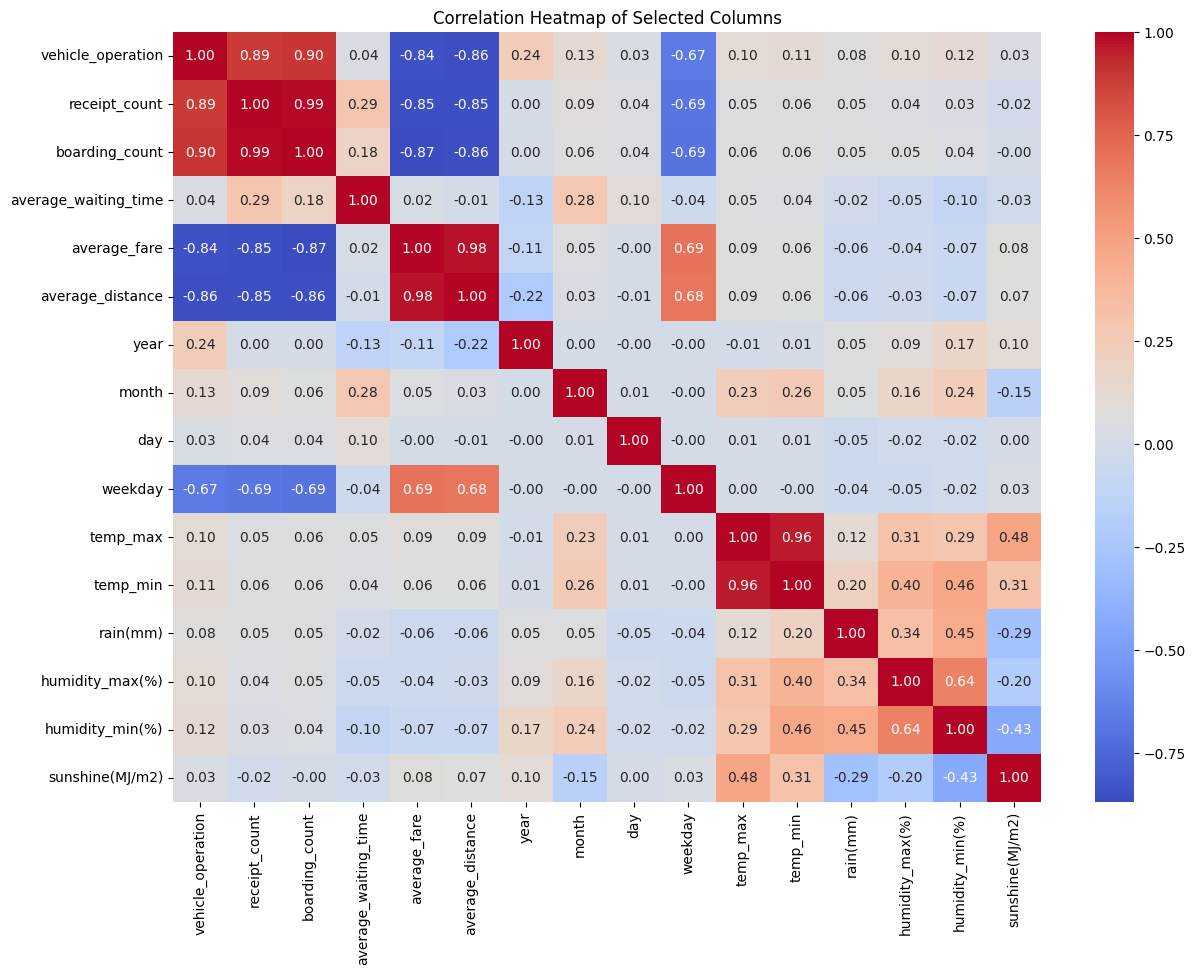

In [ ]:
selected_columns = ['vehicle_operation', 'receipt_count', 'boarding_count',
                    'average_waiting_time', 'average_fare', 'average_distance',
                    'year', 'month', 'day', 'weekday', 'temp_max', 'temp_min',
                    'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)']

sub_df = merged_df[selected_columns]
correlation_matrix = sub_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()


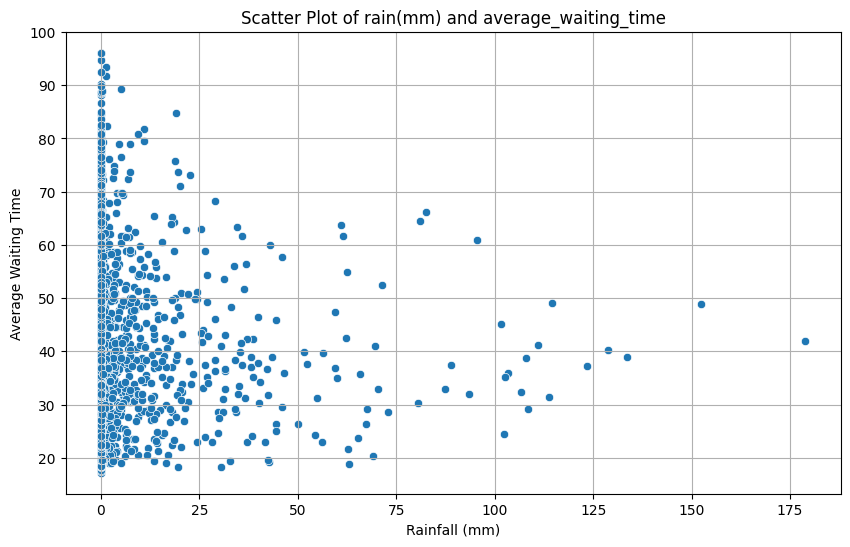

상관계수: -0.017967124575686572


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='rain(mm)', y='average_waiting_time')
plt.title('Scatter Plot of rain(mm) and average_waiting_time')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Average Waiting Time')
plt.grid(True)
plt.show()

correlation = merged_df['rain(mm)'].corr(merged_df['average_waiting_time'])
print("상관계수:", correlation)

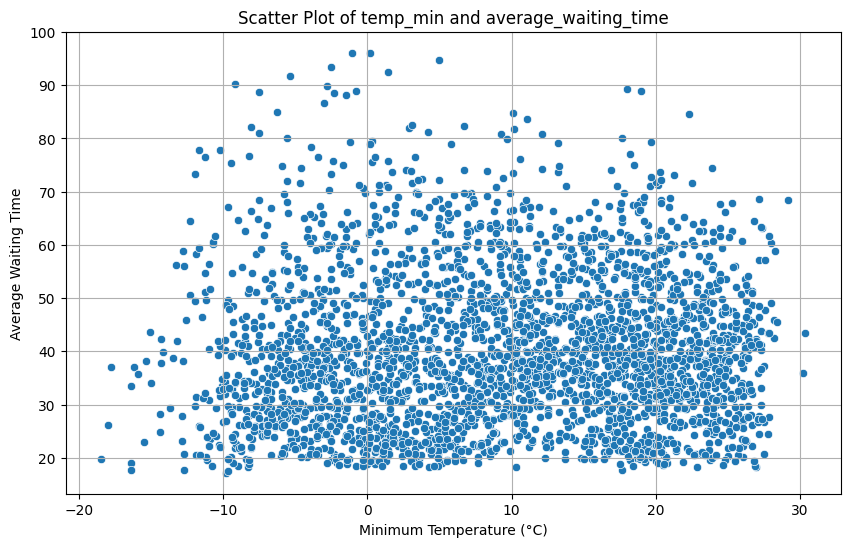

상관계수: 0.037734981016011276


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='temp_min', y='average_waiting_time')
plt.title('Scatter Plot of temp_min and average_waiting_time')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Average Waiting Time')
plt.grid(True)
plt.show()

correlation = merged_df['temp_min'].corr(merged_df['average_waiting_time'])
print("상관계수:", correlation)

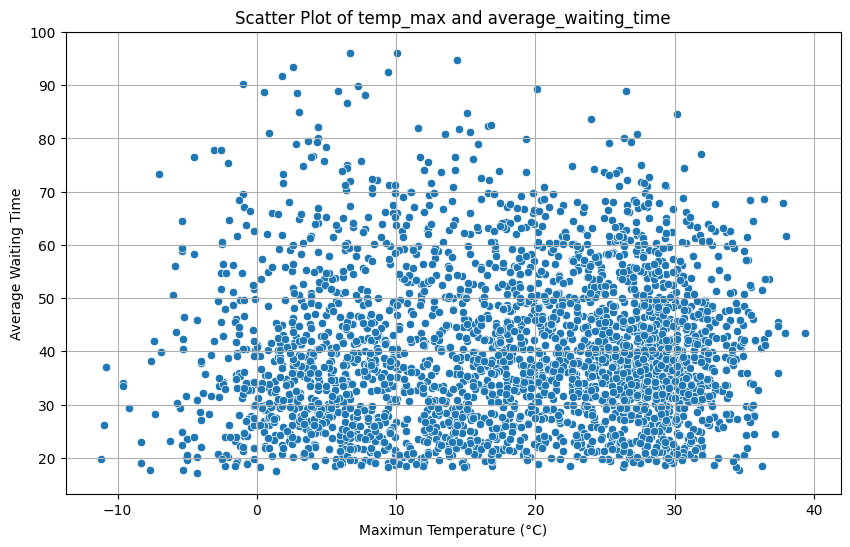

상관계수: 0.04978403154837982


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='temp_max', y='average_waiting_time')
plt.title('Scatter Plot of temp_max and average_waiting_time')
plt.xlabel('Maximun Temperature (°C)')
plt.ylabel('Average Waiting Time')
plt.grid(True)
plt.show()

correlation = merged_df['temp_max'].corr(merged_df['average_waiting_time'])
print("상관계수:", correlation)

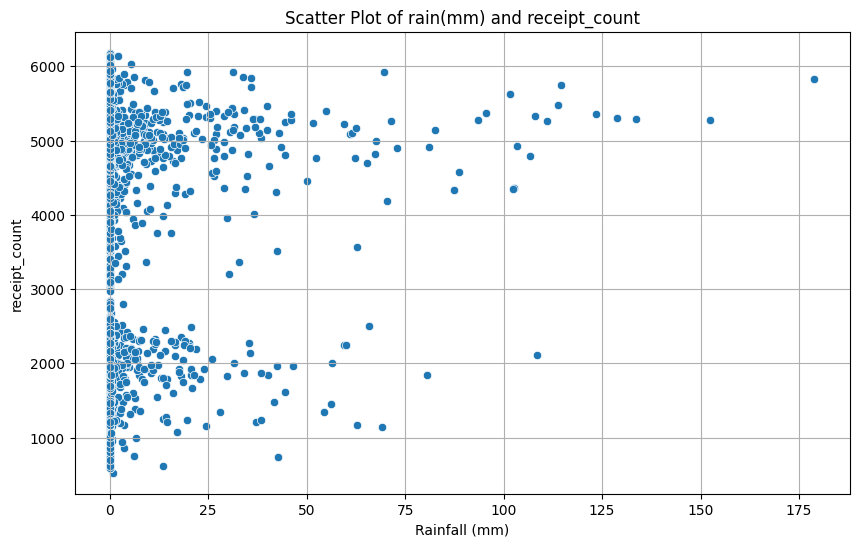

상관계수: 0.05202997141963716


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='rain(mm)', y='receipt_count')
plt.title('Scatter Plot of rain(mm) and receipt_count')
plt.xlabel('Rainfall (mm)')
plt.ylabel('receipt_count')
plt.grid(True)
plt.show()

correlation = merged_df['rain(mm)'].corr(merged_df['receipt_count'])
print("상관계수:", correlation)

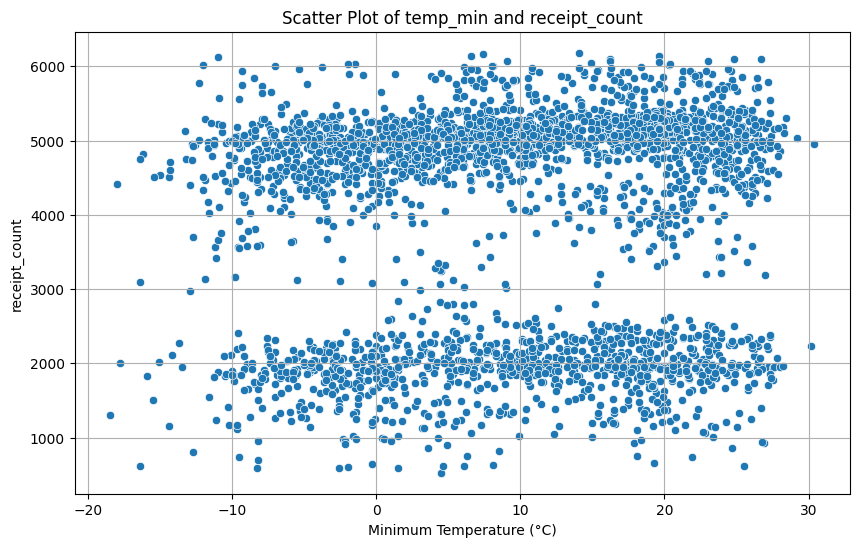

상관계수: 0.057986686869077875


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='temp_min', y='receipt_count')
plt.title('Scatter Plot of temp_min and receipt_count')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('receipt_count')
plt.grid(True)
plt.show()

correlation = merged_df['temp_min'].corr(merged_df['receipt_count'])
print("상관계수:", correlation)

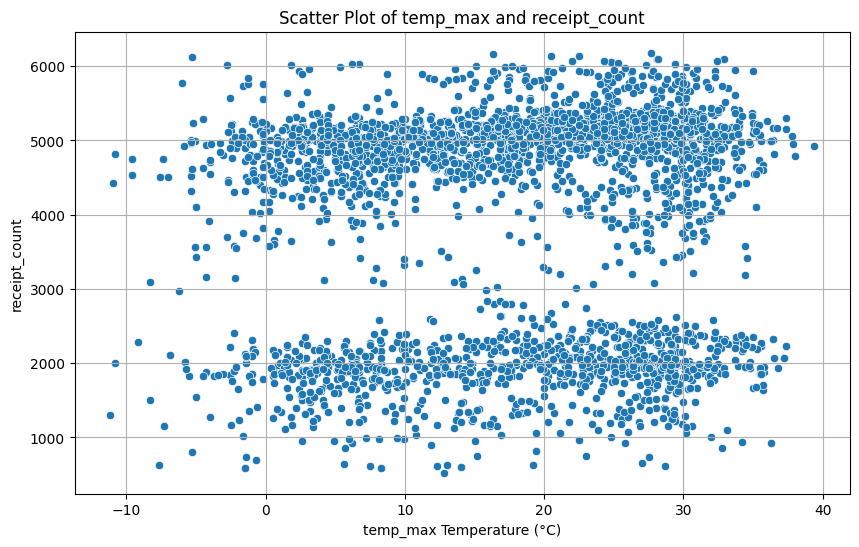

상관계수: 0.05142999689717397


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='temp_max', y='receipt_count')
plt.title('Scatter Plot of temp_max and receipt_count')
plt.xlabel('temp_max Temperature (°C)')
plt.ylabel('receipt_count')
plt.grid(True)
plt.show()

correlation = merged_df['temp_max'].corr(merged_df['receipt_count'])
print("상관계수:", correlation)

### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [95]:
merged_df['Date'] = merged_df.index

In [106]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['weekday'] = merged_df['Date'].dt.day_name()

# 요일별로 정렬
merged_df['weekday'] = pd.Categorical(merged_df['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
merged_df['season'] = merged_df['month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else ('Fall' if x in [9, 10, 11] else 'Winter')))
merged_df['season'] = pd.Categorical(merged_df['season'], categories=['Spring', 'Summer', 'Fall', 'Winter'])

merged_df.drop(labels='Date', axis=1, inplace=True)
print(merged_df)

            vehicle_operation  receipt_count  boarding_count  \
Date                                                           
2015-01-01                213           1023             924   
2015-01-02                420           3158            2839   
2015-01-03                209           1648            1514   
2015-01-04                196           1646            1526   
2015-01-05                421           4250            3730   
...                       ...            ...             ...   
2022-12-27                669           5635            4654   
2022-12-28                607           5654            4648   
2022-12-29                581           5250            4247   
2022-12-30                600           5293            4200   
2022-12-31                263           2167            1806   

            average_waiting_time  average_fare  average_distance  year  month  \
Date                                                                            
2015-

#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [100]:
!pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=af7a6dd5c6a94012e550f1328a8f76c204a8b476e463427046c6b7eea32d5dbf
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus


* 간단 사용법

In [101]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [112]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
holiday.set_index('Date', inplace=True)

print(merged_df)
print(holiday)

            vehicle_operation  receipt_count  boarding_count  \
Date                                                           
2015-01-01                213           1023             924   
2015-01-02                420           3158            2839   
2015-01-03                209           1648            1514   
2015-01-04                196           1646            1526   
2015-01-05                421           4250            3730   
...                       ...            ...             ...   
2022-12-27                669           5635            4654   
2022-12-28                607           5654            4648   
2022-12-29                581           5250            4247   
2022-12-30                600           5293            4200   
2022-12-31                263           2167            1806   

            average_waiting_time  average_fare  average_distance  year  month  \
Date                                                                            
2015-

* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [114]:
index_type = merged_df.index.dtype
print("인덱스 타입:", index_type)
index_type = holiday.index.dtype
print("인덱스 타입:", index_type)

인덱스 타입: object
인덱스 타입: datetime64[ns]


In [115]:
holiday.index = holiday.index.astype('object')

In [117]:
merged_df.index = pd.to_datetime(merged_df.index)
holiday.index = pd.to_datetime(holiday.index)

In [122]:
merged_df = pd.merge(merged_df, holiday, how='left', left_index=True, right_index=True)
merged_df = merged_df.fillna({'holiday':0})
merged_df

,vehicle_operation,receipt_count,boarding_count,average_waiting_time,average_fare,average_distance,year,month,day,weekday,target,ratio,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,Thursday,17.2,0.903226,-1.6,-1.6,0.0,64.0,64.0,0.00,Winter,1.0
2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,2,Friday,26.2,0.898987,-4.3,-9.8,0.0,52.0,33.0,9.79,Winter,0.0
2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,3,Saturday,24.5,0.918689,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter,0.0
2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,4,Sunday,26.2,0.927096,2.4,-9.2,0.0,73.0,37.0,8.66,Winter,0.0
2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,5,Monday,23.6,0.877647,8.2,0.2,0.0,89.0,58.0,5.32,Winter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,27,Tuesday,44.8,0.825909,1.5,-7.9,0.0,85.0,46.0,8.27,Winter,0.0
2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,28,Wednesday,52.5,0.822073,3.0,-7.3,0.0,86.0,51.0,10.25,Winter,0.0
2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,29,Thursday,38.3,0.808952,-0.3,-5.4,0.1,92.0,40.0,10.86,Winter,0.0


#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [123]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

merged_df['7days'] = merged_df['average_waiting_time'].rolling(window=7).mean()
print(merged_df[['average_waiting_time', '7days']])

            average_waiting_time      7days
Date                                       
2015-01-01                  23.2        NaN
2015-01-02                  17.2        NaN
2015-01-03                  26.2        NaN
2015-01-04                  24.5        NaN
2015-01-05                  26.2        NaN
...                          ...        ...
2022-12-27                  44.4  42.771429
2022-12-28                  44.8  43.514286
2022-12-29                  52.5  42.957143
2022-12-30                  38.3  41.042857
2022-12-31                  33.7  41.657143

[2953 rows x 2 columns]


#### 4) 탑승률

In [125]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

merged_df['ratio2'] = merged_df['boarding_count']/merged_df['receipt_count']
print(merged_df[['average_waiting_time', 'ratio2']])

            average_waiting_time    ratio2
Date                                      
2015-01-01                  23.2  0.903226
2015-01-02                  17.2  0.898987
2015-01-03                  26.2  0.918689
2015-01-04                  24.5  0.927096
2015-01-05                  26.2  0.877647
...                          ...       ...
2022-12-27                  44.4  0.825909
2022-12-28                  44.8  0.822073
2022-12-29                  52.5  0.808952
2022-12-30                  38.3  0.793501
2022-12-31                  33.7  0.833410

[2953 rows x 2 columns]


## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# dump(merged_df, 'data1.pkl')